In [1]:
import pandas as pd
from pandas_datareader import wb
import country_converter as coco
import os

In [2]:
os.chdir('..')

In [3]:
df = pd.read_pickle(os.path.join('dataframes_pkl', 'df_global_format.pkl'))

In [4]:
uk_index = df[df['Area'] == 'United Kingdom'].index
df.loc[uk_index, 'Area'] = 'United Kingdom of Great Britain and Northern Ireland'
ivoire_index = df[df['Area'] == "CÃ´te d'Ivoire"].index
df.loc[ivoire_index, 'Area'] = "Côte d'Ivoire"

In [5]:
list_countries = coco.CountryConverter().convert(df['Area'].unique())

More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression m

In [6]:
list_countries = list(map(lambda x: x[1] if type(x) is list else x, list_countries))

In [7]:
gdp_df = wb.download(country = list_countries, indicator = 'NY.GDP.PCAP.CD', start = df['Year'].min(), end = df['Year'].max())

In [8]:
gdp_df[gdp_df['NY.GDP.PCAP.CD'].isnull()]

NY.GDP.PCAP.CD
country          year                
French Polynesia 2017             NaN
                 2016             NaN
                 2015             NaN
                 2014             NaN
Venezuela, RB    2017             NaN
                 2016             NaN
                 2015             NaN

In [9]:
gdp_pyf = wb.download(country = 'PYF', indicator = 'NY.GDP.PCAP.CD', start = 2000, end = 2000).iloc[0,0]

In [10]:
gdp_df.columns = ['GDP_PCAP']

In [11]:
gdp_df.reset_index(inplace = True)

In [12]:
pyf_index = gdp_df[gdp_df['country'] == 'French Polynesia'].index
gdp_df.loc[pyf_index, 'GDP_PCAP'] = gdp_df.loc[pyf_index, 'GDP_PCAP'].fillna(gdp_pyf)

In [13]:
ven_gdp = gdp_df[gdp_df['country'] == 'Venezuela, RB'].iloc[3, 2]

In [14]:
gdp_df.fillna(ven_gdp, inplace = True)

In [15]:
gdp_df.isnull().sum()

country     0
year        0
GDP_PCAP    0
dtype: int64

In [16]:
gdp_df.rename({'country': 'Area', 'year': 'Year'}, axis = 1, inplace = True)

In [17]:
gdp_df.head()

,Area,Year,GDP_PCAP
0,Afghanistan,2017,516.679862
1,Afghanistan,2016,512.012778
2,Afghanistan,2015,556.007221
3,Afghanistan,2014,614.223342
4,Albania,2017,4531.019374


<AxesSubplot:>

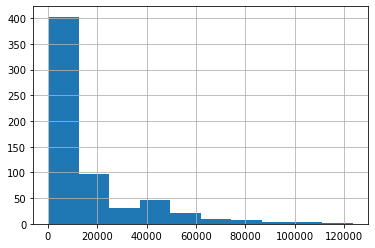

In [18]:
gdp_df['GDP_PCAP'].hist()

In [19]:
gdp_df.to_pickle(os.path.join('dataframes_pkl', 'df_gdp.pkl'))

In [20]:
url = 'http://databank.worldbank.org/data/download/site-content/OGHIST.xlsx'
income_df = pd.read_excel(url, sheet_name = 'Country Analytical History', header = None, names = ['Country', 2014, 2015, 2016, 2017], index_col = 0, engine = 'openpyxl', usecols = 'A,AD:AG', skiprows=11, skipfooter = 11)

In [21]:
dict_countries = dict(zip(list_countries, df['Area'].unique()))

In [22]:
income_df.reset_index(inplace = True)

In [23]:
income_df[income_df['Country'].isin(dict_countries.keys())]

,Country,2014,2015,2016,2017
0,AFG,L,L,L,L
1,ALB,UM,UM,UM,UM
2,DZA,UM,UM,UM,UM
6,ATG,H,H,H,H
7,ARG,H,UM,UM,H
...,...,...,...,...,...
210,VUT,LM,LM,LM,LM
211,VEN,H,UM,UM,UM
215,YEM,LM,LM,LM,L
216,ZMB,LM,LM,LM,LM


In [24]:
set(df['Area'].unique()) - set(dict_countries.values())

set()

In [25]:
len(list_countries)

156

In [26]:
list(df['Area'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chile',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, mainland',
 'China, Taiwan Province of',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran (Islamic Republic 

In [27]:
list_countries

['AFG',
 'ALB',
 'DZA',
 'ATG',
 'ARG',
 'ARM',
 'AUS',
 'AUT',
 'AZE',
 'BHS',
 'BGD',
 'BRB',
 'BLR',
 'BEL',
 'BLZ',
 'BEN',
 'BOL',
 'BIH',
 'BWA',
 'BRA',
 'BGR',
 'BFA',
 'CPV',
 'KHM',
 'CMR',
 'CAN',
 'CAF',
 'CHL',
 'HKG',
 'MAC',
 'CHN',
 'TWN',
 'COL',
 'COM',
 'COG',
 'CRI',
 'CIV',
 'HRV',
 'CUB',
 'CYP',
 'CZE',
 'DNK',
 'DJI',
 'DMA',
 'ECU',
 'EGY',
 'SLV',
 'EST',
 'SWZ',
 'ETH',
 'FJI',
 'FIN',
 'FRA',
 'PYF',
 'GAB',
 'GMB',
 'GEO',
 'DEU',
 'GHA',
 'GRC',
 'GRD',
 'GTM',
 'GIN',
 'GUY',
 'HND',
 'HUN',
 'ISL',
 'IND',
 'IDN',
 'IRN',
 'IRL',
 'ISR',
 'ITA',
 'JAM',
 'JPN',
 'JOR',
 'KAZ',
 'KEN',
 'KIR',
 'KWT',
 'KGZ',
 'LVA',
 'LBN',
 'LTU',
 'LUX',
 'MDG',
 'MWI',
 'MYS',
 'MDV',
 'MLI',
 'MLT',
 'MRT',
 'MUS',
 'MEX',
 'MNG',
 'MNE',
 'MAR',
 'NAM',
 'NPL',
 'NLD',
 'NCL',
 'NZL',
 'NIC',
 'NER',
 'NGA',
 'MKD',
 'NOR',
 'OMN',
 'PAK',
 'PAN',
 'PNG',
 'PRY',
 'PER',
 'PHL',
 'POL',
 'PRT',
 'KOR',
 'MDA',
 'ROU',
 'RUS',
 'RWA',
 'KNA',
 'LCA',
 'VCT',
 'STP',
